In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle as pkl

from google.colab import drive
user_name = '/content/drive'
drive.mount(user_name, force_remount=True)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 1. ES Baselines

In [0]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

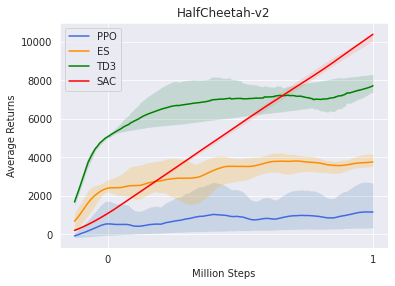

In [0]:

es_name = '/content/drive/My Drive/Colab Notebooks/Checkpoint/ES/'
ppo_name = '/content/drive/My Drive/Colab Notebooks/Checkpoint/PPO/'
td3_name = '/content/drive/My Drive/Colab Notebooks/Checkpoint/TD3/'
sac_name = '/content/drive/My Drive/Colab Notebooks/Checkpoint/SAC/'

env_list = ['LunarLanderContinuous-v2','Ant-v1','HalfCheetah-v1','Hopper-v1','InvertedPendulum-v1',
            'InvertedPendulumSwingup-v1','InvertedDoublePendulum-v1','Walker2d-v1','Reacher-v1','BipedalWalker-v2','Pong-v1']

env_list = ['HalfCheetah-v2']
sns.set_style('dark', {'axes.grid' : True})
alpha = 0.2
avg = 100
plt.figure(figsize=(20,24))
num_plots = 2*len(env_list)

count = 0
for env_name in env_list:
    count += 1
    x = 1000
    data_ppo_1 = moving_average(pkl.load(open(ppo_name+env_name+'/v1'+'/data.pkl','rb'))['avg_reward'][:x],avg)
    data_ppo_2 = moving_average(pkl.load(open(ppo_name+env_name+'/v2'+'/data.pkl','rb'))['avg_reward'][:x],avg)
    data_ppo_3 = moving_average(pkl.load(open(ppo_name+env_name+'/v3'+'/data.pkl','rb'))['avg_reward'][:x],avg)
    data_es_1 = moving_average(pkl.load(open(es_name+env_name+'/v1'+'/data.pkl','rb'))['max_rewards'][:x],avg)
    data_es_2 = moving_average(pkl.load(open(es_name+env_name+'/v2'+'/data.pkl','rb'))['max_rewards'][:x],avg)
    data_es_3 = moving_average(pkl.load(open(es_name+env_name+'/v3'+'/data.pkl','rb'))['max_rewards'][:x],avg)
    data_td3_1 = moving_average(pkl.load(open(td3_name+env_name+'/v1'+'/data.pkl','rb'))['avg_reward'][-x:],avg)
    data_td3_2 = moving_average(pkl.load(open(td3_name+env_name+'/v2'+'/data.pkl','rb'))['avg_reward'][-x:],avg)
    data_td3_3 = moving_average(pkl.load(open(td3_name+env_name+'/v3'+'/data.pkl','rb'))['avg_reward'][-x:],avg)
    data_sac_1 = moving_average(pkl.load(open(sac_name+env_name+'/v1'+'/data.pkl','rb'))['avg_reward'][-x:],avg)
    data_sac_2 = moving_average(pkl.load(open(sac_name+env_name+'/v2'+'/data.pkl','rb'))['avg_reward'][-x:],avg)
    data_sac_3 = moving_average(pkl.load(open(sac_name+env_name+'/v3'+'/data.pkl','rb'))['avg_reward'][-x:],avg)

    max_ppo = [];min_ppo = [];avg_ppo = []
    max_es = [];min_es = [];avg_es = []
    max_td3 = [];min_td3 = [];avg_td3 = []
    max_sac = [];min_sac = [];avg_sac = []
    
    for i in range(len(data_ppo_1)):
      temp_sac = [data_sac_1[i],data_sac_2[i],data_sac_3[i]]
      max_ppo.append(max(data_ppo_1[i],data_ppo_2[i],data_ppo_3[i]))
      min_ppo.append(min(data_ppo_1[i],data_ppo_2[i],data_ppo_3[i]))
      avg_ppo.append(np.mean([data_ppo_1[i],data_ppo_2[i],data_ppo_3[i]]))
      max_es.append(max(data_es_1[i],data_es_2[i],data_es_3[i]))
      min_es.append(min(data_es_1[i],data_es_2[i],data_es_3[i]))
      avg_es.append(np.mean([data_es_1[i],data_es_2[i],data_es_3[i]]))
      max_td3.append(max(data_td3_1[i],data_td3_2[i],data_td3_3[i]))
      min_td3.append(min(data_td3_1[i],data_td3_2[i],data_td3_3[i]))
      avg_td3.append(np.mean([data_td3_1[i],data_td3_2[i],data_td3_3[i]]))
      max_sac.append(max(temp_sac))
      temp_sac.remove(max(temp_sac))
      min_sac.append(min(temp_sac))
      temp_sac.remove(min(temp_sac))
      avg_sac.append(np.mean(temp_sac[0]))
    
    plt.subplot(5,3,count)
    plt.title(env_name)
    plt.plot(np.arange(0,len(avg_ppo),1),avg_ppo, color='royalblue')
    plt.fill_between(np.arange(0,len(avg_ppo),1),min_ppo,max_ppo,facecolor='steelblue', alpha=alpha, linewidth=0, antialiased=True)
    plt.plot(np.arange(0,len(avg_es),1),avg_es, color='darkorange')
    plt.fill_between(np.arange(0,len(avg_es),1),min_es,max_es,facecolor='orange', alpha=alpha, linewidth=0, antialiased=True)
    plt.plot(np.arange(0,len(avg_td3),1),avg_td3, color='green')
    plt.fill_between(np.arange(0,len(avg_td3),1),min_td3,max_td3,facecolor='seagreen', alpha=alpha, linewidth=0, antialiased=True)
    plt.plot(np.arange(0,len(avg_sac),1),avg_sac, color='red')
    plt.fill_between(np.arange(0,len(avg_sac),1),min_sac,max_sac,facecolor='salmon', alpha=alpha, linewidth=0, antialiased=True)
    plt.xticks([avg,1000-avg],[0,1])
    plt.xlabel('Million Steps')
    plt.ylabel('Average Returns')
    plt.legend(['PPO','ES','TD3','SAC'])




## 2. TradeR Baselines

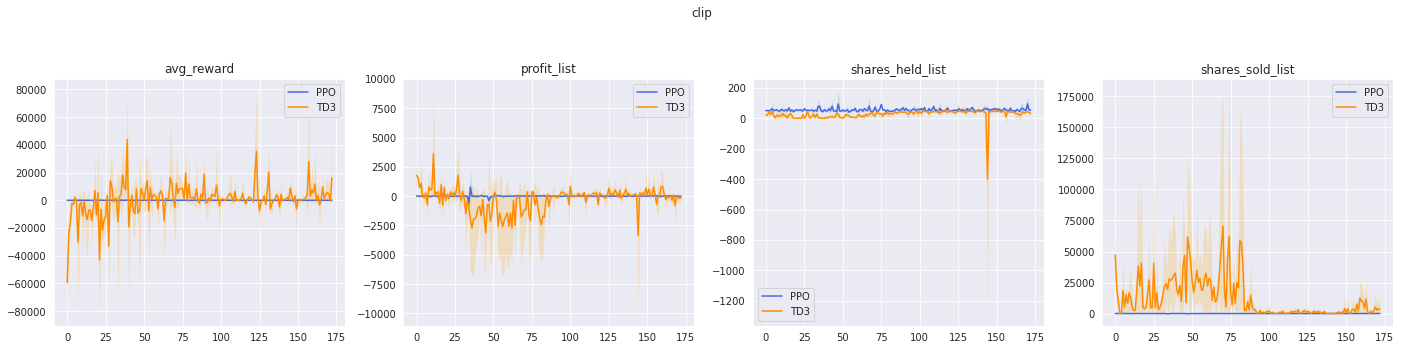

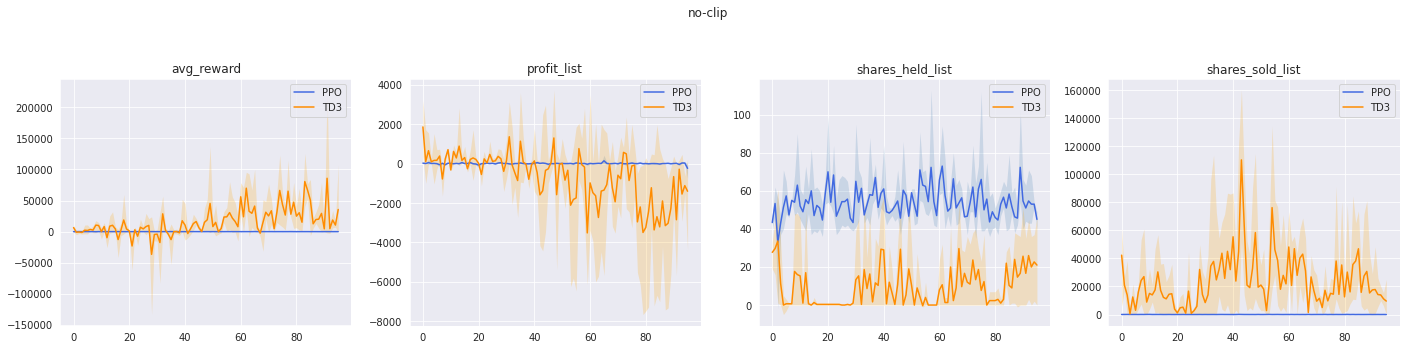

In [0]:
head_name = '/content/drive/My Drive/Colab Notebooks/Checkpoint/'
clip_name = 'clip'
noclip_name = 'no-clip'

assess = [clip_name, noclip_name]
check = ['avg_reward','profit_list','shares_held_list','shares_sold_list']

for name in assess:
  sns.set_style('dark', {'axes.grid' : True})
  alpha = 0.2
  plt.figure(figsize=(24,10))
  plt.suptitle(name)
  num_plots = 1
  fixed_len = 100

  data_ppo_1 = pkl.load(open(head_name+name+'/baseline-PPO'+'/data0.pkl','rb'))
  data_ppo_2 = pkl.load(open(head_name+name+'/baseline-PPO'+'/data1.pkl','rb'))
  data_ppo_3 = pkl.load(open(head_name+name+'/baseline-PPO'+'/data2.pkl','rb'))
  data_td3_1 = pkl.load(open(head_name+name+'/baseline-TD3'+'/data0.pkl','rb'))
  data_td3_2 = pkl.load(open(head_name+name+'/baseline-TD3'+'/data1.pkl','rb'))
  data_td3_3 = pkl.load(open(head_name+name+'/baseline-TD3'+'/data2.pkl','rb'))

  for n in check:
    ppo_avg = []; ppo_min = []; ppo_max = []
    td3_avg = []; td3_min = []; td3_max = []
    fixed_len = min(data_ppo_1['episodes'],data_ppo_2['episodes'],data_ppo_3['episodes'],data_td3_1['episodes'],data_td3_2['episodes'],data_td3_3['episodes'])
    for j in range(fixed_len):
      ppo_min.append(min(data_ppo_1[n][j],data_ppo_2[n][j],data_ppo_3[n][j]))
      ppo_max.append(max(data_ppo_1[n][j],data_ppo_2[n][j],data_ppo_3[n][j]))
      ppo_avg.append(np.mean([data_ppo_1[n][j],data_ppo_2[n][j],data_ppo_3[n][j]]))
      td3_min.append(min(data_td3_1[n][j],data_td3_2[n][j],data_td3_3[n][j]))
      td3_max.append(max(data_td3_1[n][j],data_td3_2[n][j],data_td3_3[n][j]))
      td3_avg.append(np.mean([data_td3_1[n][j],data_td3_2[n][j],data_td3_3[n][j]]))


    plt.subplot(2,4,num_plots)
    plt.title(n)
    plt.plot(np.arange(0,len(ppo_avg),1),ppo_avg, color='royalblue')
    plt.fill_between(np.arange(0,len(ppo_avg),1),ppo_min,ppo_max,facecolor='steelblue', alpha=alpha, linewidth=0, antialiased=True)
    plt.plot(np.arange(0,len(td3_avg),1),td3_avg, color='darkorange')
    plt.fill_between(np.arange(0,len(td3_avg),1),td3_min,td3_max,facecolor='orange', alpha=alpha, linewidth=0, antialiased=True)
    plt.legend(['PPO','TD3'])
    num_plots += 1


## TD3 for 10 M steps with hold penalty

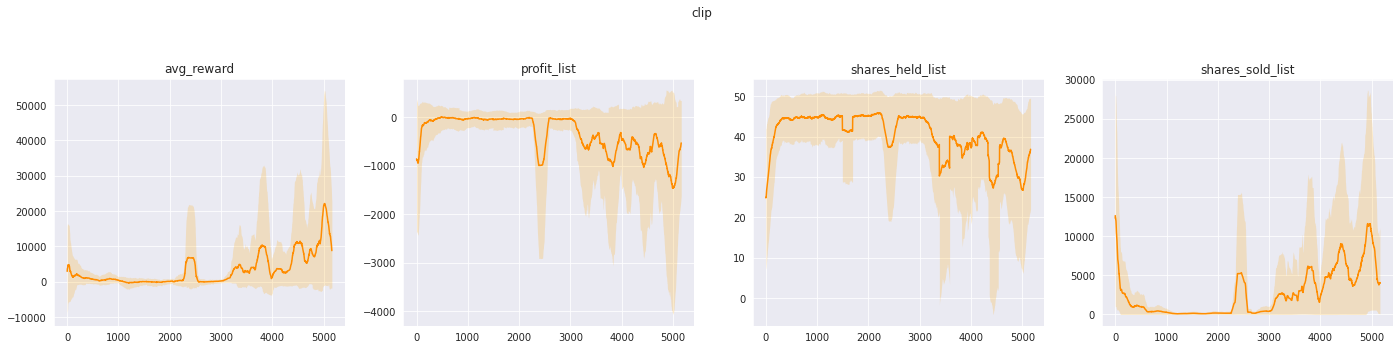

In [0]:
head_name = '/content/drive/My Drive/Colab Notebooks/Checkpoint/'
clip_name = 'clip'

assess = [clip_name]
check = ['avg_reward','profit_list','shares_held_list','shares_sold_list']
avg = 200

for name in assess:
  sns.set_style('dark', {'axes.grid' : True})
  alpha = 0.2
  plt.figure(figsize=(24,10))
  plt.suptitle(name)
  num_plots = 1
  fixed_len = 100

  data_td3_1 = pkl.load(open(head_name+name+'/TD3'+'/data0.pkl','rb'))
  data_td3_2 = pkl.load(open(head_name+name+'/TD3'+'/data1.pkl','rb'))
  data_td3_3 = pkl.load(open(head_name+name+'/TD3'+'/data2.pkl','rb'))

  for n in check:
    td3_avg = []; td3_min = []; td3_max = []
    fixed_len = min(data_td3_1['episodes'],data_td3_2['episodes'],data_td3_3['episodes'])
    for j in range(fixed_len):
      td3_min.append(min(data_td3_1[n][j],data_td3_2[n][j],data_td3_3[n][j]))
      td3_max.append(max(data_td3_1[n][j],data_td3_2[n][j],data_td3_3[n][j]))
      td3_avg.append(np.mean([data_td3_1[n][j],data_td3_2[n][j],data_td3_3[n][j]]))

    td3_min = moving_average(td3_min, avg)
    td3_max = moving_average(td3_max, avg)
    td3_avg = moving_average(td3_avg, avg)

    plt.subplot(2,4,num_plots)
    plt.title(n)
    plt.plot(np.arange(0,len(td3_avg),1),td3_avg, color='darkorange')
    plt.fill_between(np.arange(0,len(td3_avg),1),td3_min,td3_max,facecolor='orange', alpha=alpha, linewidth=0, antialiased=True)
    num_plots += 1


## Hierarchical Q-Learning (HRL-Q) for 10M steps

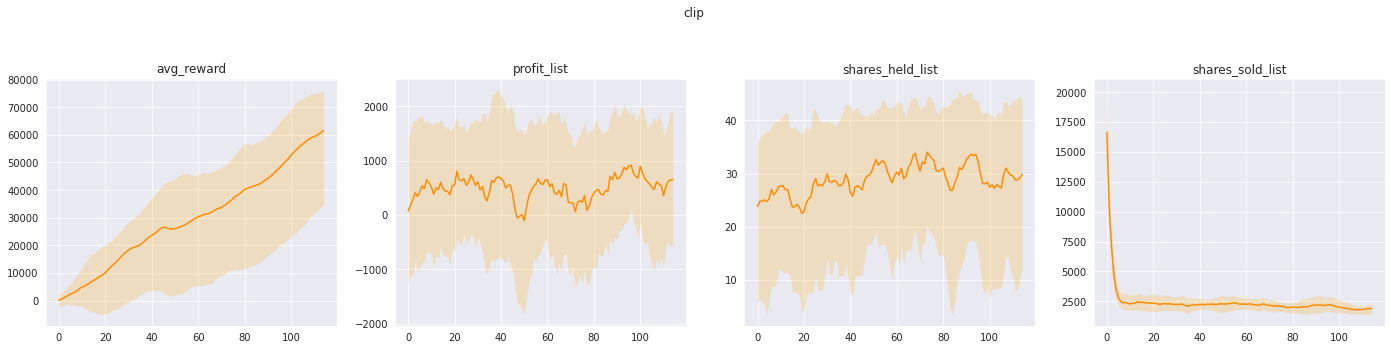

In [12]:
head_name = '/content/drive/My Drive/Colab Notebooks/Checkpoint/'
clip_name = 'clip'

assess = [clip_name]
check = ['avg_reward','profit_list','shares_held_list','shares_sold_list']
avg = 10

for name in assess:
  sns.set_style('dark', {'axes.grid' : True})
  alpha = 0.2
  plt.figure(figsize=(24,10))
  plt.suptitle(name)
  num_plots = 1
  fixed_len = 100

  data_td3_1 = pkl.load(open(head_name+name+'/HRL-Q'+'/data0.pkl','rb'))
  data_td3_2 = pkl.load(open(head_name+name+'/HRL-Q'+'/data1.pkl','rb'))
  data_td3_3 = pkl.load(open(head_name+name+'/HRL-Q'+'/data2.pkl','rb'))

  for n in check:
    td3_avg = []; td3_min = []; td3_max = []
    fixed_len = min(data_td3_1['episodes'],data_td3_2['episodes'],data_td3_3['episodes'])
    for j in range(fixed_len):
      td3_min.append(min(data_td3_1[n][j],data_td3_2[n][j],data_td3_3[n][j]))
      td3_max.append(max(data_td3_1[n][j],data_td3_2[n][j],data_td3_3[n][j]))
      td3_avg.append(np.mean([data_td3_1[n][j],data_td3_2[n][j],data_td3_3[n][j]]))

    td3_min = moving_average(td3_min, avg)
    td3_max = moving_average(td3_max, avg)
    td3_avg = moving_average(td3_avg, avg)

    plt.subplot(2,4,num_plots)
    plt.title(n)
    plt.plot(np.arange(0,len(td3_avg),1),td3_avg, color='darkorange')
    plt.fill_between(np.arange(0,len(td3_avg),1),td3_min,td3_max,facecolor='orange', alpha=alpha, linewidth=0, antialiased=True)
    num_plots += 1


In [11]:
len(data_td3_3['avg_reward'])

124